<a href="https://colab.research.google.com/github/gmoriki/C4RA-Python-Tutorials/blob/main/0630/0630_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8回C4RA勉強会
## データ可視化

---

## ★ 勉強会の基本方針

* 5月12日(金)から6月30日(金)までの計8回を予定しています。
* 目標は**pandas.DataFrame形式の基本的な操作をマスターすること**です。

* 環境はGoogle Colaboratory(通称Colab)を使用します。Googleアカウントをご用意ください。
  * 各々のローカル環境でも実行可能です。
* 一部、東京大学「Pythonプログラミング入門」の教材を共有しながら勉強会を進めます。
  * 勉強会では**東大教材**と呼びます
  * URL：https://utokyo-ipp.github.io/index.html

* Colab（Jupyter Notebook）の詳しい使い方について、勉強会の中で深入りはしません
  * Colab立ち上げのURL：https://colab.research.google.com/
  * 便利なショートカット：https://blog.kikagaku.co.jp/google-colaboratory-shortcut

* Pythonに関する不明点があれば森木(Pumble,Mail,Twitter等)までご連絡ください
* 勉強会の内容でなくてもOKです（Colabの使い方や環境構築なども）
---

## ■ データの可視化(Matplotlib)

### Matplotlibの特徴

* **強力なカスタマイズ性**：フォント、ラベル、線の種類、色、グラフのサイズなど、あらゆる要素を細かくカスタマイズできます。
* **豊富なグラフの種類**：折れ線グラフ、棒グラフ、ヒストグラム、散布図、等高線図、3Dグラフなど、さまざまなグラフを作成できます。
* **サブプロットの作成**：1つの図内に複数のグラフ（サブプロット）を表示することができます。これにより、複数のデータを同時に比較することが可能です。
* **各種データ形式への対応**：Numpy配列やPandasのDataFrameなど、様々なデータ形式を取り扱うことができます。

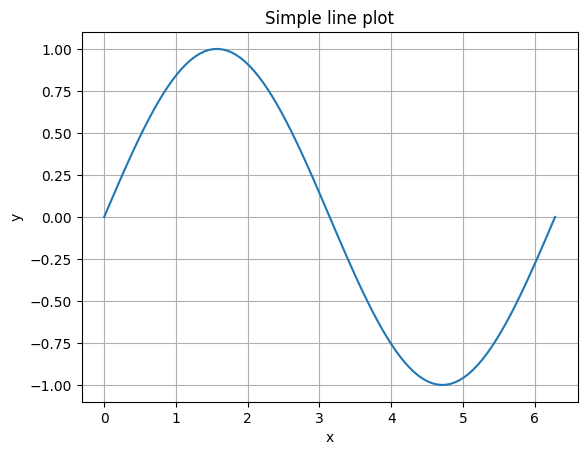

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# データの作成
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# グラフの描画
plt.plot(x, y)
plt.title("Simple line plot")  # タイトル
plt.xlabel("x")  # x軸ラベル
plt.ylabel("y")  # y軸ラベル
plt.grid(True)  # グリッド線

# グラフの表示
plt.show()

#### **東大教材(データの可視化)**
* ▲簡単なデータの可視化
  * https://colab.research.google.com/github/utokyo-ipp/utokyo-ipp.github.io/blob/master/colab/appendix/3-visualization.ipynb
* ▲Matplotlibライブラリ
  * https://colab.research.google.com/github/utokyo-ipp/utokyo-ipp.github.io/blob/master/colab/appendix/5-matplotlib.ipynb

## ■ データの可視化(seaborn)

### Seaborn

SeabornはmatplotlibベースのPythonデータ可視化ライブラリです。魅力的で情報量の多い統計グラフィックを描くための高レベルなインターフェースを提供します。

https://seaborn.pydata.org/
https://seaborn.pydata.org/tutorial/introduction.html

In [5]:
import seaborn as sns
sns.set_theme()

# seabornから'tips'データセットを読み込む
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


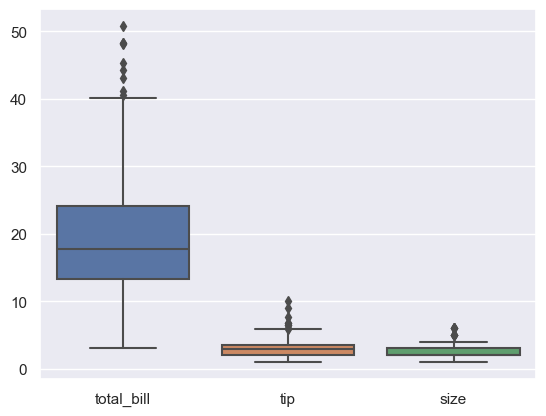

In [15]:
import seaborn as sns

# ボックスプロットの例
sns.boxplot(data=df)
plt.show()

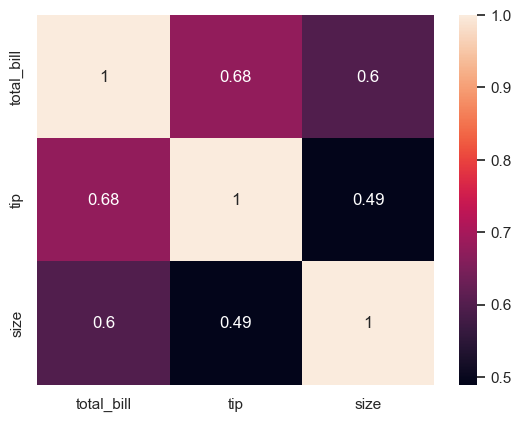

In [12]:
# ヒートマップの例
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True)
plt.show()

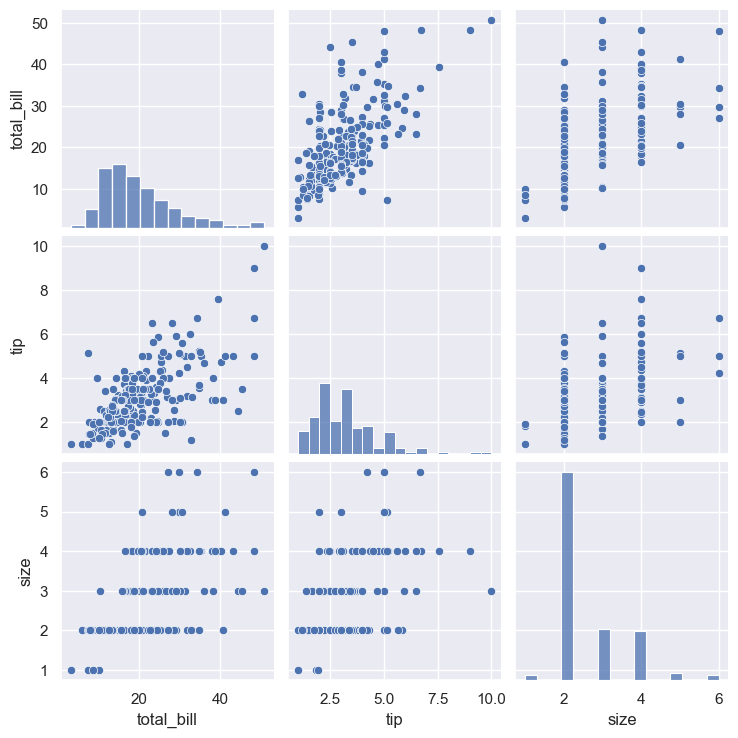

In [9]:
# ペアプロットの例
sns.pairplot(df)
plt.show()

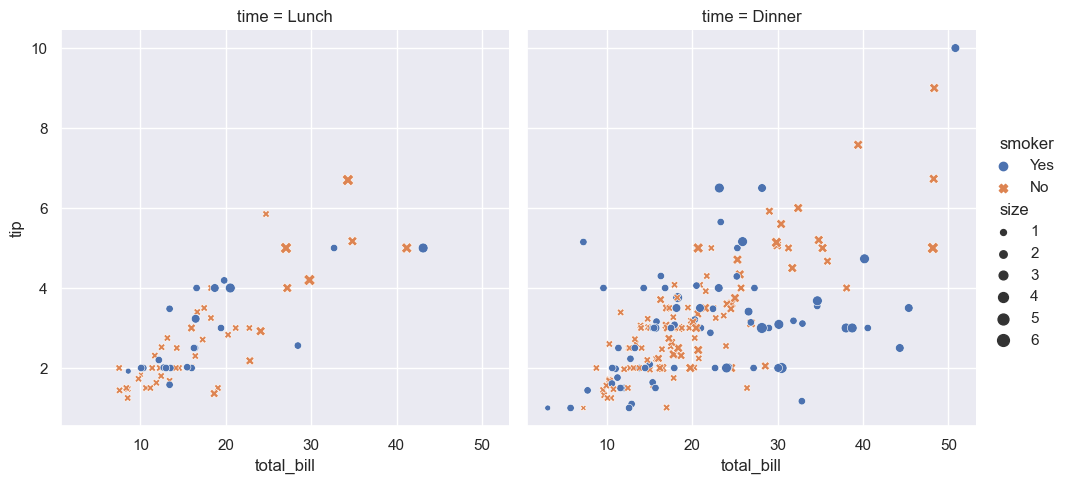

In [14]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

<AxesSubplot: xlabel='size', ylabel='count'>

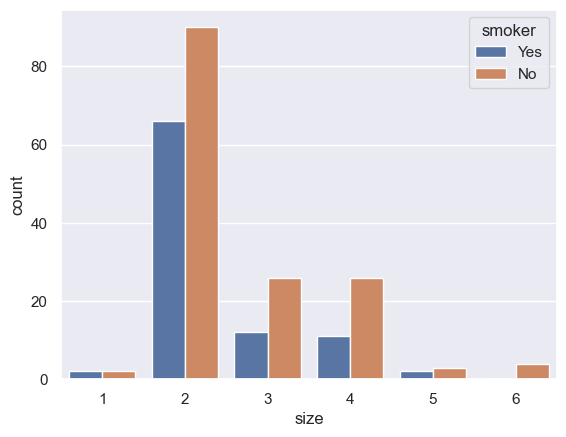

In [18]:
sns.countplot(x='size', data=df, hue='smoker')

https://seaborn.pydata.org/examples/layered_bivariate_plot.html

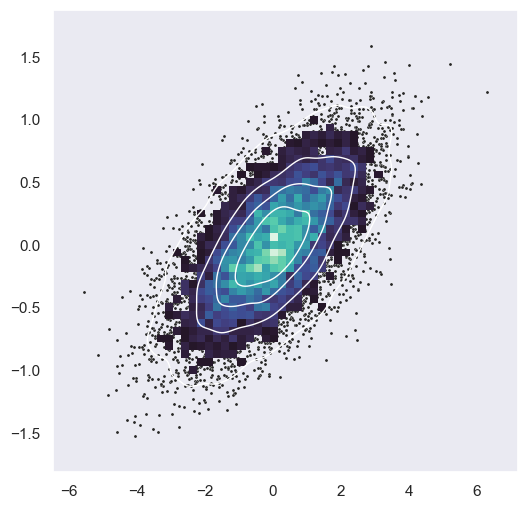

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

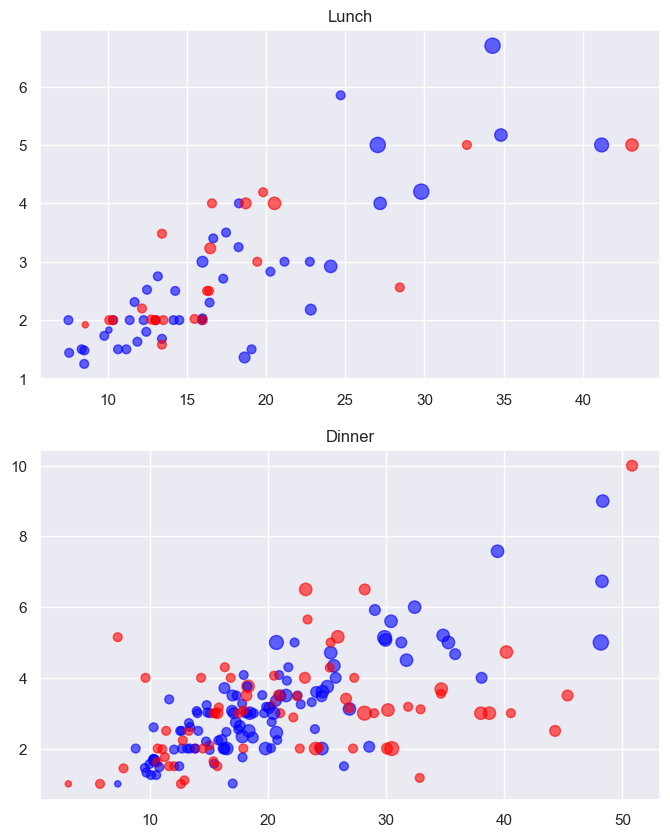

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
tips = sns.load_dataset("tips")

# Split the data into lunch and dinner
lunch = tips[tips['time'] == 'Lunch']
dinner = tips[tips['time'] == 'Dinner']

# Create the subplot figure
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot Lunch
ax[0].scatter(lunch['total_bill'], lunch['tip'], c=lunch['smoker'].map({"Yes": 'red', "No": 'blue'}),
              s=lunch['size'] * 20, alpha=0.6)
ax[0].set_title('Lunch')

# Plot Dinner
ax[1].scatter(dinner['total_bill'], dinner['tip'], c=dinner['smoker'].map({"Yes": 'red', "No": 'blue'}),
              s=dinner['size'] * 20, alpha=0.6)
ax[1].set_title('Dinner')

# Show the plot
plt.show()
